In [92]:
#Importing Libraries
import numpy as np 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
import matplotlib.pyplot as plt 
import pandas as pd 

### Importing the data 
The data is imported and loaded using pandas and numpy methods below

In [25]:
#Importing data 
df = pd.read_csv("datafiles/Data.csv")

In [26]:
df.shape

(300, 4)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source       300 non-null    object 
 1   Destination  300 non-null    object 
 2   Distance     299 non-null    float64
 3   Cost         299 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [28]:
df.isnull().sum()

Source         0
Destination    0
Distance       1
Cost           1
dtype: int64

In [30]:
df.dropna(inplace=True)
df.shape

(299, 4)

In [31]:
df.describe()

,Distance,Cost
count,299.000000,299.000000
mean,1474.260278,156728.610111
std,821.096040,87290.719977
min,39.819000,4233.157890
25%,794.930000,84509.008300
50%,1393.342000,148126.188020
75%,2050.567000,217995.777770
max,3688.812000,392157.603720


In [71]:
df['Distance'].to_numpy()

array([ 827.003, 2870.403, 2156.109, 2198.27 ,  509.098, 1676.228,
        102.754,  957.922,  360.893,  654.485, 1426.548, 3170.96 ,
       1744.933,  563.605, 1479.851, 2056.976, 1068.07 , 1518.003,
        412.955, 1697.817, 1836.183,  516.471, 2799.631,  211.98 ,
        365.636, 1461.093, 3396.898,  880.395,  761.354, 1546.755,
       1948.785, 1507.297, 2719.313,  999.342,  345.008,  758.42 ,
       1128.118,  197.078, 3080.143,  960.918, 2243.462, 3308.776,
       2117.09 ,  799.605, 1504.767,  911.918, 1136.702, 1371.796,
        634.744,  962.876, 2544.612, 1087.245, 2328.811,  424.366,
       1925.136,  649.9  , 2004.262, 2222.075,  689.154, 3253.606,
        662.005,  565.451, 1059.142, 2194.775,  622.955, 2340.042,
       1685.037, 1736.702,  370.144, 1754.102,  538.009, 2148.67 ,
       1595.1  , 2409.064, 1371.617, 1693.293,  971.087,  543.551,
        884.459, 1195.741, 2260.18 , 1963.651,  600.837, 1130.21 ,
       1492.72 , 1402.543,   93.482,  834.461, 1424.926,  673.

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source       299 non-null    string 
 1   Destination  299 non-null    string 
 2   Distance     299 non-null    float64
 3   Cost         299 non-null    float64
dtypes: float64(2), string(2)
memory usage: 11.7 KB


In [73]:
X_train,X_test,y_train,y_test = train_test_split(df['Distance'],df['Cost'],train_size=0.75)

In [84]:

# X_test = X_test.to_numpy()
# y_train,y_test = y_train.to_numpy(),y_test.to_numpy()

## Normalize/Scale the Data

In [87]:
#### This cell has been added at the end as to emphasize the importance of Normalisiing the data ######
#Before Fitting to the model , we need to reshape the data
X_train_shape = X_train.reshape((-1,1))

#Calculating mean and standard deviation for single data points
mean,sigma = np.mean(X_train),np.std(X_train)
#Normalise the data 
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train_shape)
X_train_norm.shape


(224, 1)

## Apply the gradient Descent 
SGDRegressor is used to apply the gradient descent

In [88]:

#Training our model by fitting to the linear model
gradient_descent = SGDRegressor(max_iter=1000)
gradient_descent.fit(X_train_norm,y_train)

SGDRegressor()

In [89]:
#Extracting weights and bias from gradient Descent 
w_norm = gradient_descent.coef_
b_norm = gradient_descent.intercept_
print(f"The weights and the bias would be w : {w_norm} and b : {b_norm} respectively")

The weights and the bias would be w : [87900.34979505] and b : [159281.61116957] respectively


## Predict the data

In [101]:
#Predicting the data 
y_pred = gradient_descent.predict(X_train_norm)


### Measuring Accuracy for Training Data

In [94]:
#Measuring the accuracy 
# model evaluation for training set

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for training set
--------------------------------------
MAE is 7.260485754323042
MSE is 77.0600483965997
R2 score is 0.9999999900284807
Accuracy : 99.999999%


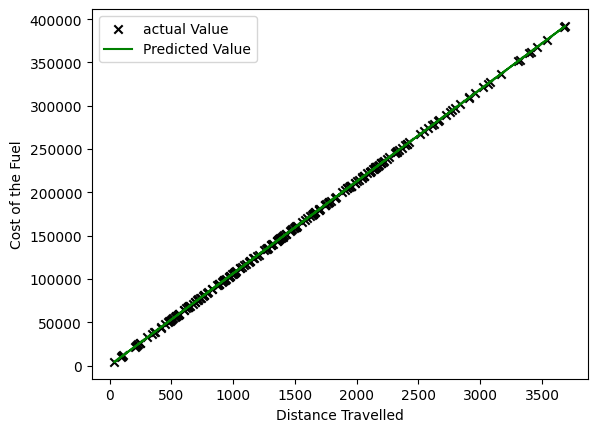

In [95]:
# print(X_train,y_train,y_pred,sep=" ")
plt.scatter(X_train,y_train,marker='x',c='black',label='actual Value')
plt.plot(X_train,y_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [99]:
#Predicting for a new value
X_test_new = X_test.reshape((-1,1))
# X_test_norm = scale.fit(X_test_new)
X_test_norm = scale.transform(X_test_new)
# print(X_test_norm[:10])

### Computating Z_Score normalisation instead of scale.transform() for better accuracy #####

# X_test_norm = (X_test_new - mean) / sigma
# print(X_test_new)
y_test_pred = gradient_descent.predict(X_test_norm)

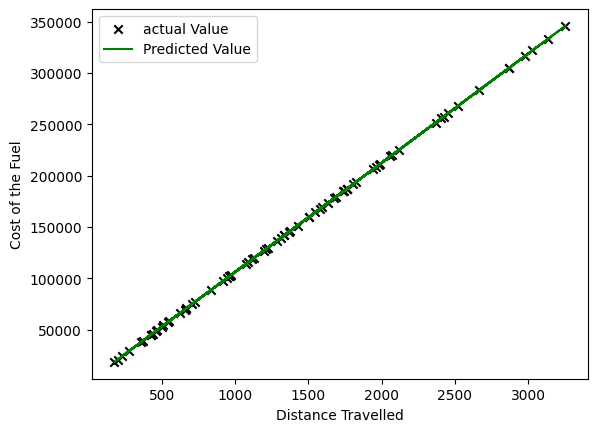

In [97]:
# print(X_test,y_test,y_pred,sep=" ")
plt.scatter(X_test,y_test,marker='x',c='black',label='actual Value')
plt.plot(X_test,y_test_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

### Measuring the accuracy for testing Data

In [100]:
# model evaluation for testing set

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for testing set
--------------------------------------
MAE is 7.032856426353052
MSE is 72.0061775818017
R2 score is 0.9999999898823354
Accuracy : 99.999999%
